<a href="https://colab.research.google.com/github/ManalSahafi/master-degree/blob/main/ML/clustring_models_machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy.stats import multivariate_normal
%matplotlib inline
import seaborn as sns
#for normalization + probability density function computation
from scipy import stats

from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read the dataset

In [ ]:
realEstate=pd.read_csv("/content/drive/MyDrive/realEstate_Riyadh.csv", sep=';')
#drop columns not include in our expermanints
realEstate.drop(columns=[ "latitude", 'longitude', 'age'], inplace=True) 
realEstate

,id,district,area,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,onMarket,IsRent,price
0,4596035,حي النظيم,225.0,3,0.0,2,15.0,1.0,0.0,5.00,17,False,20000
1,4599813,حي الفيحاء,130.0,3,1.0,2,30.0,1.0,0.0,4.33,5,True,25000
2,4554519,حي الرمال,200.0,3,1.0,2,25.0,0.0,0.0,4.67,15,True,22000
3,4120004,حي العقيق,120.0,1,1.0,1,34.0,1.0,0.0,4.17,165,False,38000
4,4498954,حي التعاون,60.0,1,1.0,1,39.0,1.0,0.0,4.42,48,False,25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,4538503,حي النرجس,180.0,3,1.0,2,18.0,1.0,0.0,4.31,33,False,60000
6758,3130523,حي غبيرة,90.0,2,1.0,1,5.0,0.0,0.0,4.82,493,False,9800
6759,4453217,حي اليرموك,120.0,3,1.0,2,20.0,1.0,1.0,5.00,62,False,50000
6760,4586116,حي النرجس,200.0,2,2.0,2,15.0,1.0,0.0,4.54,20,False,40000


In [ ]:
#Number of rows and columns in the dataset 
realEstate.shape

(6762, 13)

# Dealing with missing value 

In [ ]:
#First: 
#compute all NaN value in each column
realEstate.isnull().sum()

id                    0
district              0
area                175
num_bedrooms          0
num_livings           2
num_water_cycles      0
street_width        210
IsKetchen            17
IsFurnished          45
review              399
onMarket              0
IsRent                0
price                 0
dtype: int64

In [ ]:
#Second:
#Replacing all NaN values with 0
realEstate.fillna({'review':0}, inplace=True)
realEstate.fillna({'num_livings':0}, inplace=True)
realEstate.fillna({'IsKetchen':0}, inplace=True)
realEstate.fillna({'IsFurnished':0}, inplace=True)

In [ ]:
#Thired:
#Drope all rows has NaN value from dataset
data=realEstate.dropna()

#Finally:
#Examing the changes
data

,id,district,area,num_bedrooms,num_livings,num_water_cycles,street_width,IsKetchen,IsFurnished,review,onMarket,IsRent,price
0,4596035,حي النظيم,225.0,3,0.0,2,15.0,1.0,0.0,5.00,17,False,20000
1,4599813,حي الفيحاء,130.0,3,1.0,2,30.0,1.0,0.0,4.33,5,True,25000
2,4554519,حي الرمال,200.0,3,1.0,2,25.0,0.0,0.0,4.67,15,True,22000
3,4120004,حي العقيق,120.0,1,1.0,1,34.0,1.0,0.0,4.17,165,False,38000
4,4498954,حي التعاون,60.0,1,1.0,1,39.0,1.0,0.0,4.42,48,False,25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,4538503,حي النرجس,180.0,3,1.0,2,18.0,1.0,0.0,4.31,33,False,60000
6758,3130523,حي غبيرة,90.0,2,1.0,1,5.0,0.0,0.0,4.82,493,False,9800
6759,4453217,حي اليرموك,120.0,3,1.0,2,20.0,1.0,1.0,5.00,62,False,50000
6760,4586116,حي النرجس,200.0,2,2.0,2,15.0,1.0,0.0,4.54,20,False,40000


In [ ]:
print(data['IsRent'].value_counts())

False    3616
True     2936
Name: IsRent, dtype: int64


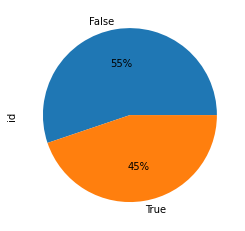

In [ ]:
data.groupby('IsRent')['id'].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%')

#Exploratory Data Analysis (EDA)


In [ ]:
data.columns

Index(['id', 'district', 'area', 'num_bedrooms', 'num_livings',
       'num_water_cycles', 'street_width', 'IsKetchen', 'IsFurnished',
       'review', 'onMarket', 'IsRent', 'price'],
      dtype='object')

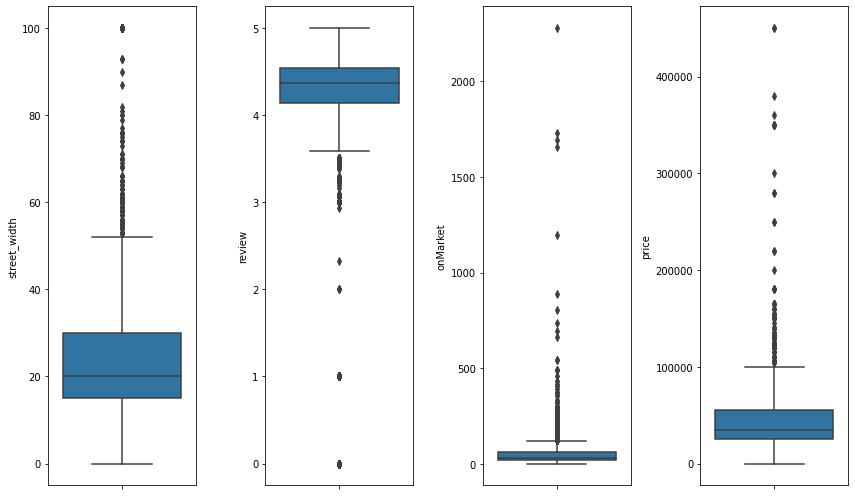

In [ ]:
import seaborn as sns

#Discover outliers

a = ['street_width',  'review', 'onMarket', 'price']
i = 1
plt.figure(figsize=(15,7))
for b in a:
    plt.subplot(1,5,i)
    sns.boxplot(y = b,data= data)
    i+=1
    plt.tight_layout()

# **Removing the outliers**

In [ ]:

print("Shape of data Before outlier removal is: ", data.shape)

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (  (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data
     
data1= removeOutliers(data, data.columns[2]) #age
data2= removeOutliers(data1, data.columns[6]) #street_width
data3= removeOutliers(data2, data.columns[9]) #review
data4= removeOutliers(data3, data.columns[10]) #onMarket	
dataset= removeOutliers(data4, data.columns[12]) #price

print("Shape of data After outlier removal is: ", dataset.shape)

Shape of data Before outlier removal is:  (6552, 13)
Shape of data After outlier removal is:  (5015, 13)


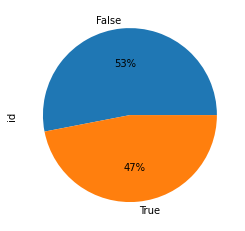

In [ ]:
dataset.groupby('IsRent')['id'].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.0f%%')

## **Feature Engineering**

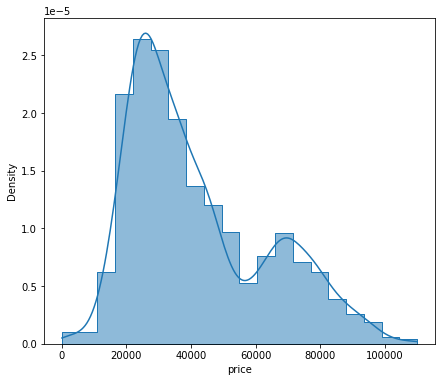

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=dataset,x=dataset.columns[12],stat='density',bins=20,kde=True,
             palette=[sns.color_palette()[0],sns.color_palette()[3]],element='step')

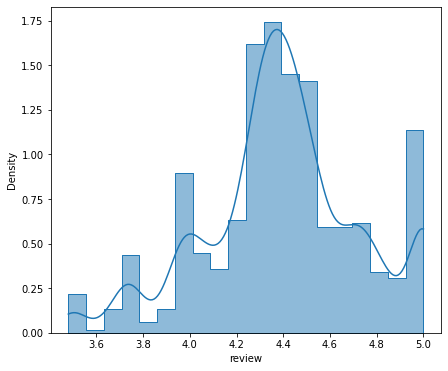

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=dataset,x=dataset.columns[9],stat='density',bins=20,kde=True,
             palette=[sns.color_palette()[0],sns.color_palette()[3]],element='step')

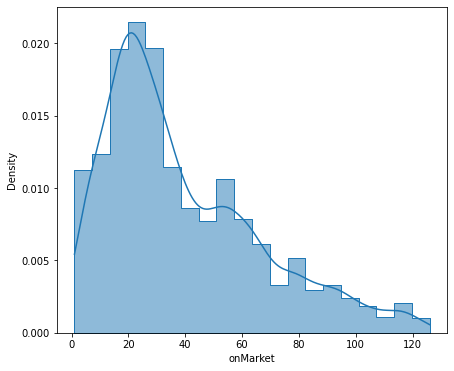

In [ ]:
plt.figure(figsize=(7,6))
sns.histplot(data=dataset,x=dataset.columns[10],stat='density',bins=20,kde=True,
             palette=[sns.color_palette()[0],sns.color_palette()[3]],element='step')

# **Normalization Dataset**

In [ ]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

LE=LabelEncoder()
for i in object_cols:
    dataset[i]=dataset[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

Categorical variables in the dataset: ['district']
All features are now numerical


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
dataset.drop(columns=['IsRent', 'id'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5.015000e+03,5.015000e+03,5.015000e+03,5.015000e+03,5.015000e+03,5.015000e+03,5.015000e+03,5.015000e+03,5.015000e+03,5.015000e+03,5.015000e+03
mean,7.828013e-17,-1.246815e-16,6.942491e-17,4.108821e-17,-4.958922e-18,-1.501845e-16,7.792592e-18,8.430168e-17,-1.054125e-15,5.242289e-17,1.126384e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.163026e+00,-1.983241e+00,-1.414156e+00,-2.209080e+00,-1.174120e+00,-1.882342e+00,-2.612224e+00,-2.684014e-01,-2.732023e+00,-1.386093e+00,-1.954473e+00
25%,-7.922174e-01,-6.282065e-01,-5.130132e-01,1.507905e-02,-1.174120e+00,-6.359802e-01,3.828156e-01,-2.684014e-01,-4.888395e-01,-7.322197e-01,-7.891019e-01
50%,2.776818e-01,1.330489e-01,3.881291e-01,1.507905e-02,-8.189000e-02,-1.908509e-01,3.828156e-01,-2.684014e-01,-1.029374e-02,-2.963039e-01,-3.219256e-01
75%,8.460657e-01,5.898022e-01,3.881291e-01,1.507905e-02,1.010340e+00,6.994078e-01,3.828156e-01,-2.684014e-01,5.729339e-01,5.755276e-01,6.124269e-01
max,1.815662e+00,2.599517e+00,3.992698e+00,8.911716e+00,3.194799e+00,2.657977e+00,3.828156e-01,3.725762e+00,1.814162e+00,3.154696e+00,3.181896e+00


# **A investigate: The performance of a 𝑘 Means Model**

In [ ]:
#Select k random points from the data as centroids
def initialize_random_centroids(K, X):
    num_examples = X.shape[0]
    num_features = X.shape[1]
    centroids = np.empty((K, num_features))
    for k in range(K): 
        centroid = X[np.random.choice(range(num_examples))]
        centroids[k] = centroid
    return centroids 

# Assign all the points to the closest cluster centroid using  Euclidean distance equation
def create_cluster(K, X, centroids):
    clusters = [[] for _ in range(K)]
    for point_idx, point in enumerate(X):
        closest_centroid = np.argmin(np.sqrt(np.sum((point-centroids)**2, axis=1)))
        clusters[closest_centroid].append(point_idx)
    return clusters 
# Recompute the new centroids
def calculate_new_centroids(K, cluster, X):
    num_features = X.shape[1]
    centroids = np.empty((K, num_features))
    for idx, cluster in enumerate(cluster):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[idx] = new_centroid
    return centroids

# prediction
def predict_cluster(clusters, X):
    num_examples = X.shape[0]
    y_pred = np.empty(num_examples)
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_pred[sample_idx] = cluster_idx
    return y_pred

# fit data
def kMean(K, X, max_iterations):
    tolerance = 10**(-3)
    centroids = initialize_random_centroids(K,X)
    for _ in range(max_iterations):
        clusters = create_cluster(K, X, centroids)
        previous_centroids = centroids
        centroids = calculate_new_centroids(K, clusters, X) 
        diff = centroids - previous_centroids 
        if not diff.any():
            break
        y_pred = predict_cluster(clusters, X)
        N, D = X.shape
        new_loss = 0
        loss = 0
        for j in range(0, K):
            # Compute loss
            for i in range(0, X.shape[0]):
                new_loss = np.sum(np.power(X[i, :] - centroids[j], 2))           
            if np.abs(loss - new_loss) < tolerance:
                return y_pred , new_loss
        loss = new_loss
        return y_pred , loss

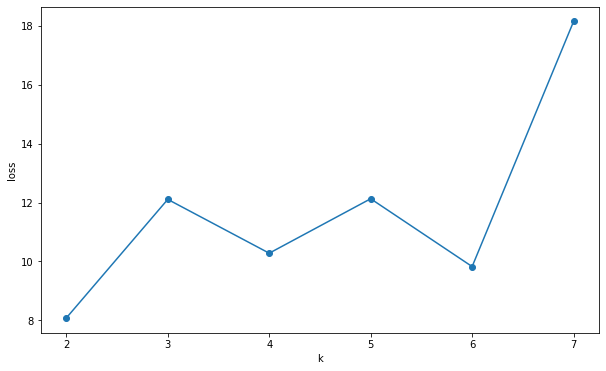

In [ ]:
#Find the optimal number of 𝑘.

K = np.arange(2, 8)
losses = np.zeros(8 - 2)
for i in range(0, 8 - 2):
    classifications, loss = kMean(K[i], data_scaled, 10000 )
    losses[i] = loss

fig = plt.figure(figsize=(10, 6))
fig.tight_layout()
plt.plot(K, losses, marker = "o")
plt.xlabel("k")
plt.ylabel("loss")
plt.show()

In [ ]:
cluster_kmean , loss = kMean(2, data_scaled, 10000)
dataset['cluster_kmean'] = cluster_kmean
dataset['cluster_kmean'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1.0    3376
0.0    1639
Name: cluster_kmean, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


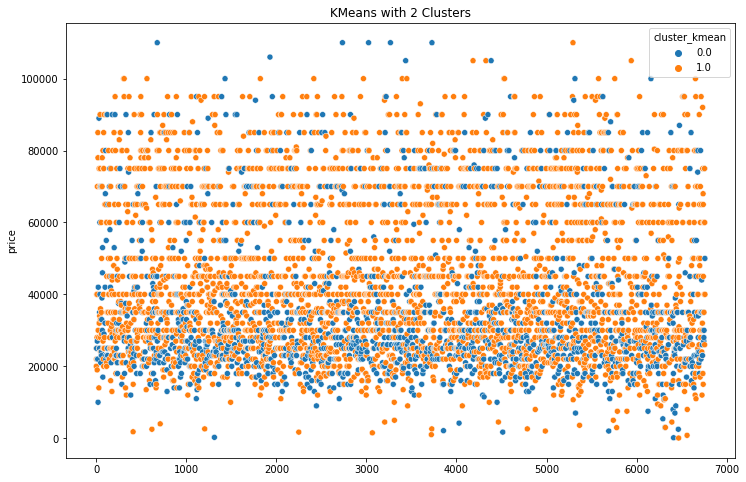

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(dataset.index,dataset['price'] , hue=dataset['cluster_kmean'] )
plt.title('KMeans with 2 Clusters')
plt.show()

# **B investigate: Gaussian Mixture Model**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


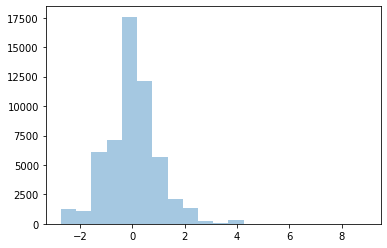

In [ ]:
#plot histogram
sns.distplot(data_scaled, bins=20, kde=False)

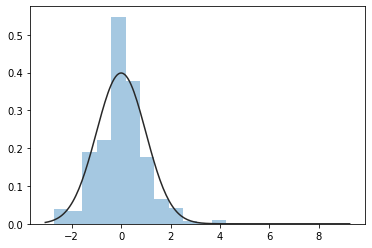

In [ ]:
#try to fit a normal distribution to this data
sns.distplot(data_scaled, fit=stats.norm, bins=20, kde=False,)

 A multivariate Gaussian (“multivariate” just means multiple input variables) is more complex because there is the possibility for the different variables to have different variances, and even for there to be correlation between the variables.

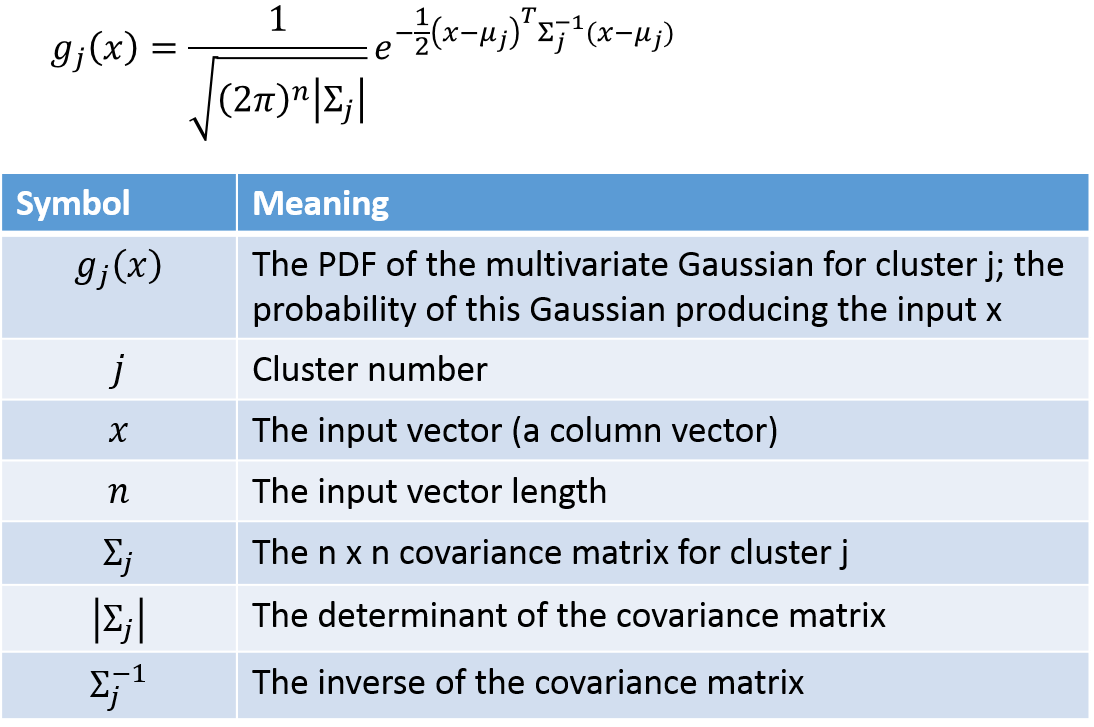

The probability that example point i belongs to cluster j can be calculated using the following:

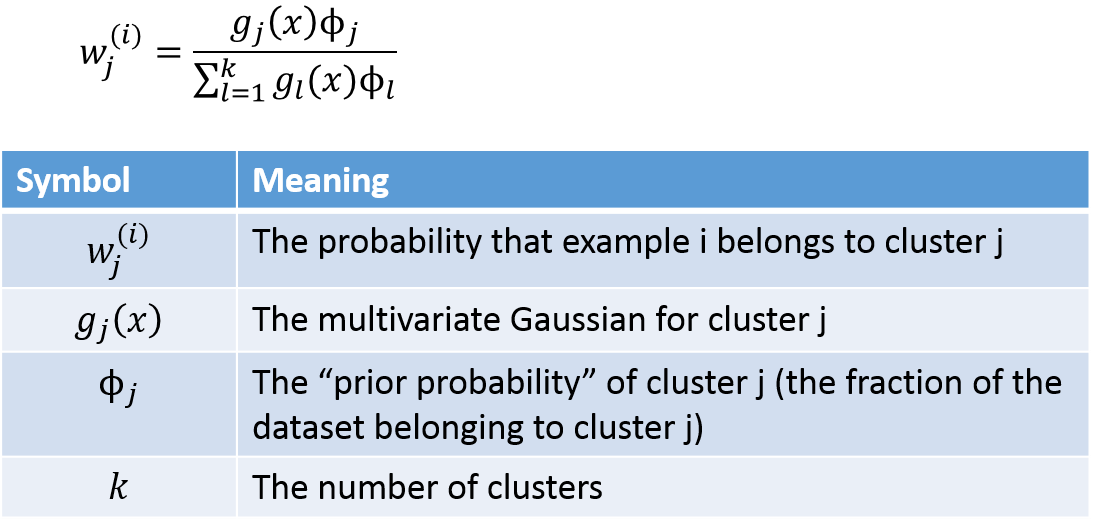

We’ll apply this equation to every example and every cluster, giving us a matrix with one row per example and one column per cluster.

the update rules for the maximization step are below

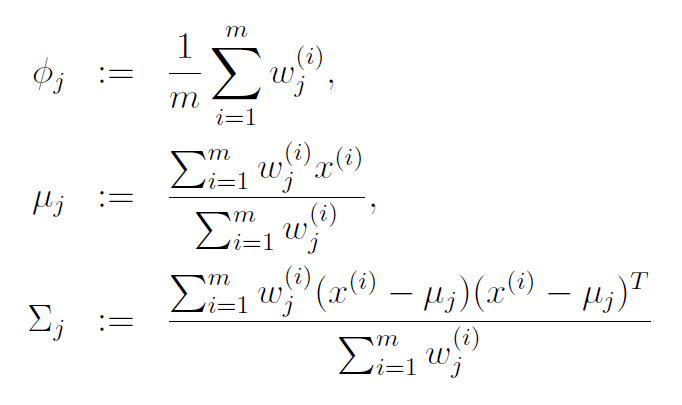

The equation for mean (mu) of cluster j is just the average of all data points in the training set, with each example weighted by its probability of belonging to cluster j.

Similary, the equation for the covariance matrix is the same as the equation you would use to estimate the covariance of a dataset, except that the contribution of each example is again weighted by the probability that it belongs to cluster j.

The prior probability of cluster j, denoted as phi, is calculated as the average probability that a data point belongs to cluster j.

In [ ]:
def initialize(X, k):
    shape = X.shape 
    n, m = shape 
    #The prior probability of cluster j, denoted as phi, is calculated as the average probability that a data point belongs to cluster j.
    phi = np.full(shape= k, fill_value=1/ k) 
    #The probability that example point i belongs to cluster j 
    weights = np.full(shape= shape, fill_value=1/ k)    
    # dataset is divided randomly into k parts of unequal sizes
    random_row = np.random.randint(low=0, high= n, size= k)
    # initial value of mean of k Gaussians
    mu = [  X[row_index,:] for row_index in random_row ] 
    # initial value of covariance matrix of k Gaussians
    sigma = [ np.cov(X.T) for _ in range(k) ] 
    
    return phi, mu, sigma

    # E-Step: update weights and phi 
def e_step(X, k, mu , sigma, phi):
    weights = predict_proba(X, k, mu , sigma, phi)
    #the average of all data points in the training set, with each example weighted by its probability of belonging to cluster j.
    phi = weights.mean(axis=0)
    return weights, phi

    # M-Step: update meu and sigma 
def m_step(X, k, mu , sigma, phi):
    weights, phi = e_step(X, k, mu , sigma, phi)
    for i in range(k):
        weight = weights[:, [i]]
        total_weight = weight.sum()
        mu[i] = (X * weight).sum(axis=0) / total_weight
        sigma[i] = np.cov(X.T,aweights=(weight/total_weight).flatten(), bias=True)
    return mu, sigma 

# predicts probability of each data point wrt each cluster
def predict_proba(X, k, mu , sigma, phi):
    shape = X.shape 
    # n has the number of rows while m has the number of columns of dataset X
    n, m = shape 
    likelihood = np.zeros( ( n, k) ) 
    for i in range(k):
        distribution = multivariate_normal(mean= mu[i],cov= sigma[i])
        # pdf : probability denisty function
        likelihood[:,i] = distribution.pdf(X) 
        numerator = likelihood * phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
    return weights
    # predict function 
def predict(X, k, mu , sigma, phi):
    weights = predict_proba(X, k, mu , sigma, phi)
    return np.argmax(weights, axis=1)
     
def Gmm(X, k , max_iter):
    tolerance = 10**(-3)
    phi, mu, sigma =  initialize(X, k)
    for iteration in range(max_iter):   
        new_weights, new_phi = e_step(X, k, mu , sigma, phi)
        new_mu, new_sigma = m_step(X, k, mu , sigma, phi)
        y_cluster = predict_proba(X, k, new_mu , new_sigma, new_phi)
        return y_cluster


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


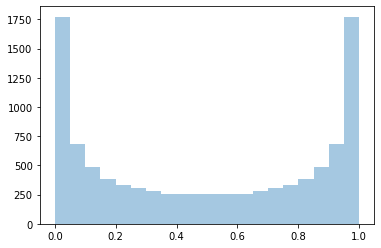

In [ ]:
cl =Gmm(data_scaled, 2 , 10000)
#plot histogram
sns.distplot(cl, bins=20, kde=False)

Computing best model with random restarts...



AttributeError: ignored

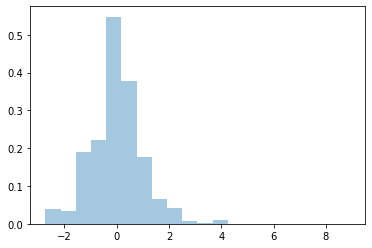

In [ ]:
# Find best Mixture Gaussian model
cl =Gmm(data_scaled, 2 , 10000)
n_iterations = 20
n_random_restarts = 500
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
for _ in range(n_random_restarts):
    mix = cl
    for _ in range(n_iterations):
        try:
            if mix > best_loglike:
                best_loglike = mix
        except (ZeroDivisionError, ValueError, RuntimeWarning): # Catch division errors from bad starts, and just throw them out...
            pass
#mixture
#fit a single gaussian curve to the data
x = np.linspace(-6, 8, 200)

sns.distplot(data_scaled, bins=20, kde=False, norm_hist=True)
g_both = [best_loglike.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
plt.legend();

In [ ]:
print(best_mix)

None


AttributeError: ignored

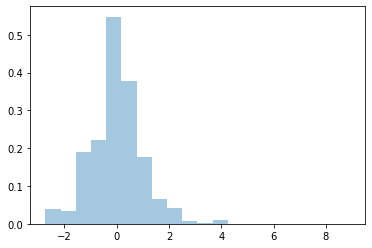

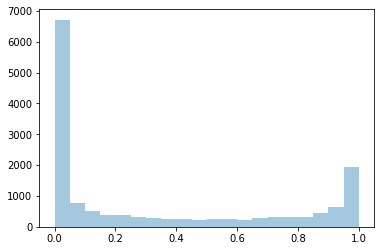

In [ ]:
cl =Gmm(data_scaled, 3 , 10000)
#plot histogram
sns.distplot(cl, bins=20, kde=False)

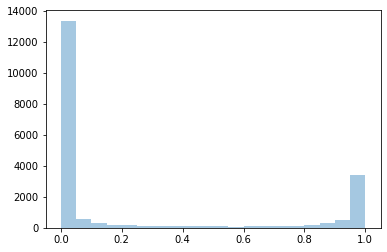

In [ ]:
cl =Gmm(data_scaled, 4 , 10000)
#plot histogram
sns.distplot(cl, bins=20, kde=False)